In [2662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('csv/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


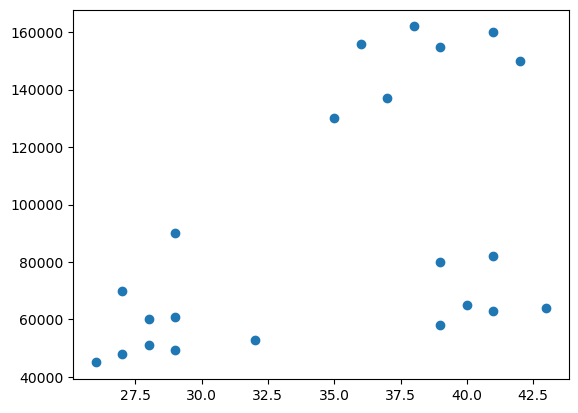

In [2663]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [2664]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop(columns='Name'))
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [2665]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


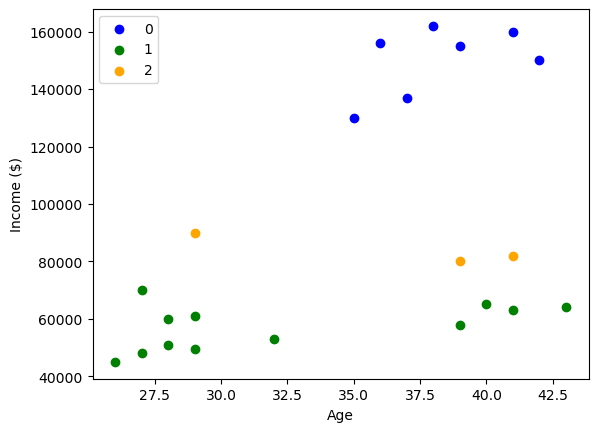

In [2680]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], label='0', color='blue')
plt.scatter(df1['Age'], df1['Income($)'], label='1', color='green')
plt.scatter(df2['Age'], df2['Income($)'], label='2', color='orange')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [2702]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [2710]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop(columns='Name'))
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [2712]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


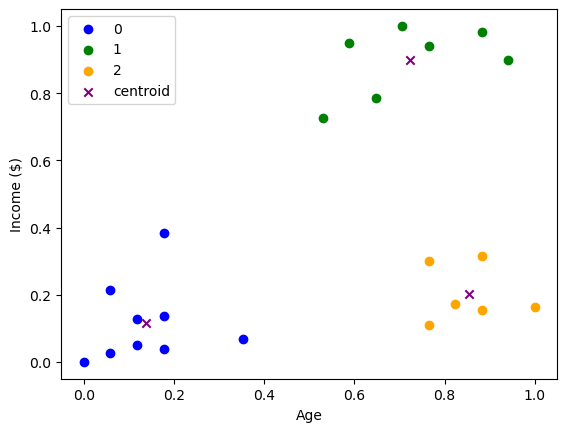

In [2716]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], label='0', color='blue')
plt.scatter(df1['Age'], df1['Income($)'], label='1', color='green')
plt.scatter(df2['Age'], df2['Income($)'], label='2', color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='x', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [2740]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # km.inertia gives back sse

sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3923766528801945,
 0.2621792762345213,
 0.22624835214667532,
 0.19429256406898143,
 0.2000063035230722,
 0.1239440248475235]

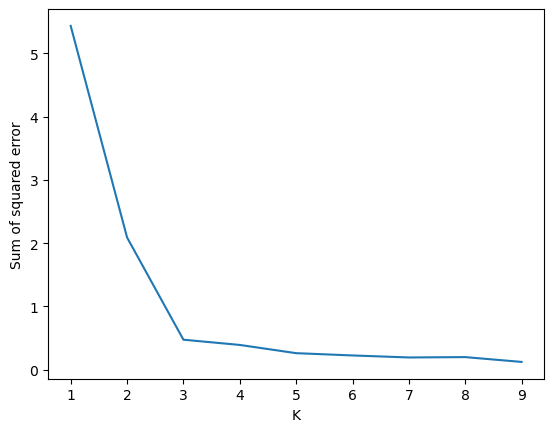

In [2744]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show() # elbow method, elbow is 3 which is number of clusters we got